In [1]:
from OLS.OLS import * 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

%load_ext autoreload
%autoreload 2

plt.style.use('ggplot')

## Import data for EDA

Import Boston dataset with the next attributes columns:

1. *CRIM*      per capita crime rate by town
2. *ZN*        proportion of residential land zoned for lots over  25,000 sq.ft.
3. *INDUS*     proportion of non-retail business acres per town
4. *CHAS*      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. *NOX*       nitric oxides concentration (parts per 10 million)
6. *RM*        average number of rooms per dwelling
7. *AGE*       proportion of owner-occupied units built prior to 1940
8. *DIS*       weighted distances to five Boston employment centres
9. *RAD*       index of accessibility to radial highways
10. *TAX*      full-value property-tax rate per \$10000
11. *PTRATIO*  pupil-teacher ratio by town
12. *BRATIO*        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. *LSTAT*    % lower status of the population
14. *MEDV*     Median value of owner-occupied homes in \$1000's


In [2]:
dataset_name = 'housing.data'
dataset_columns = ['CR', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BRATIO', 'LSTAT', 'MEDV']

dataset = pd.read_csv('datasets/housing.data', 
                      delim_whitespace=True, 
                      header=None, 
                      names=dataset_columns)

### Dataset analysis

Perform simple dataset analysis on correlation, atd.

In [3]:
dataset.shape

(506, 14)

In [4]:
dataset.head()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
dataset.tail()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [6]:
dataset.describe()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
def colorCorrelatedFeatures(value):
    """
    Color higly correlated pairs of features
    """
    color = 'green' if abs(value) > 0.74 and abs(value) != 1 else 'white'
    return 'background-color: %s' % color
    

dataset.corr().style.applymap(colorCorrelatedFeatures)

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
CR,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Let's investigate mostly correlated features

I will plot them as scatter plots to see the next points:

1. Mostly correlated parts of the graph
2. Possible outliers of the 4 plots
3. The necessity of scaling some axes

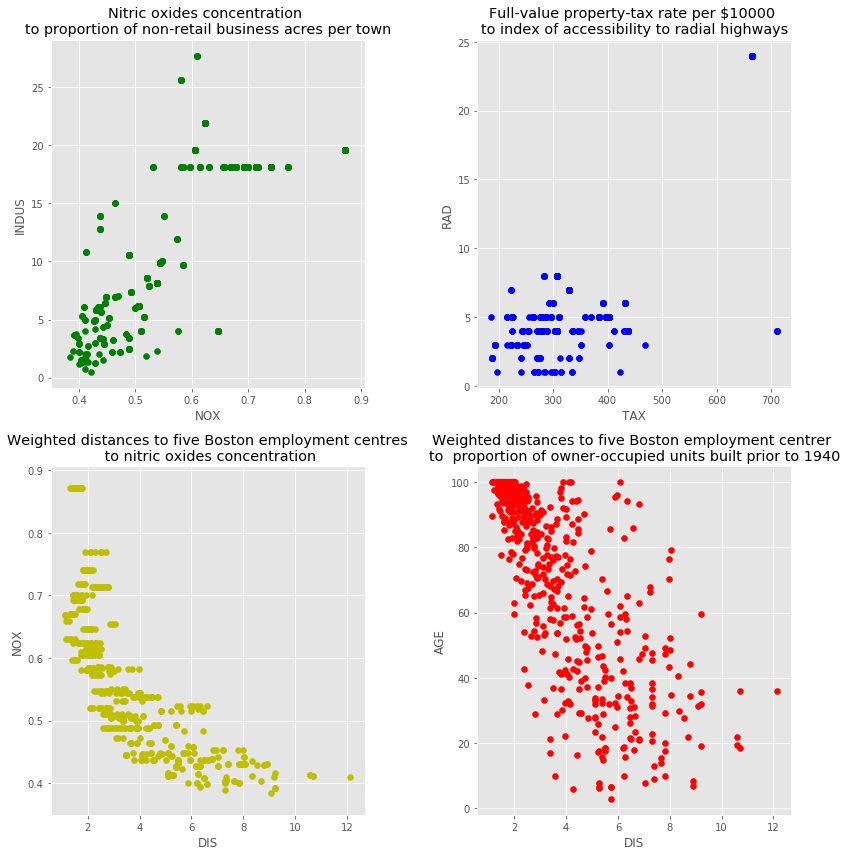

In [8]:
def plot(axes, x_feature, y_feature, x_label, y_label, color, description):
    """
    Plots scatter plot with the specified parameters
    """
    axes.scatter(x_feature, y_feature, c=color)
    axes.set_title(description)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)

def plotFeatures():
    
    figure, (axes1, axes2) = plt.subplots(2, 2, figsize = (12, 12))

    description = "Nitric oxides concentration \nto proportion of non-retail business acres per town"
    plot(axes1[0], dataset['NOX'], dataset['INDUS'], 'NOX', 'INDUS', 'g', description)

    description = "Weighted distances to five Boston employment centres\n to nitric oxides concentration"
    plot(axes2[0], dataset['DIS'], dataset['NOX'], 'DIS', 'NOX', 'y', description)

    description = "Full-value property-tax rate per $10000 \nto index of accessibility to radial highways"
    plot(axes1[1], dataset['TAX'], dataset['RAD'], 'TAX', 'RAD', 'b', description)
    
    description = "Weighted distances to five Boston employment centrer \nto  proportion of owner-occupied units built prior to 1940"
    plot(axes2[1], dataset['DIS'], dataset['AGE'], 'DIS', 'AGE', 'r', description)
    
    figure.tight_layout()
    
    plt.show()

plotFeatures()

In [9]:
def normalize(series: pd.Series) -> pd.Series:
    """
    Basic min-max normalization
    """
    return(series - series.min()) / (series.max() - series.min())

def filter_max(series: pd.Series, maximum_value):
    """
    Replaces outliers with the mean value
    """
    mean = series.mean()
    return series.apply(lambda x: x if x < maximum_value else mean)
    

Here we see that the mostly data is not clean and need some preparation:

### Plot NOX to INDUS:
As I see NOX is the percentage in range from 0 to 1, but mostly features as in range from 0 to 0.7, so remove outliers and normalise INDUS column

In [10]:
dataset['NOX'] = filter_max(dataset['NOX'], 0.7)
dataset['INDUS'] = filter_max(dataset['INDUS'], 15)
dataset['INDUS'] = normalize(dataset['INDUS'])

### Plot NOX to the DIS
Here we can try to normalize dis feature

In [11]:
dataset['DIS'] = normalize(dataset['DIS'])

### Plot RAD to TAX
Perform only basic min-max normalization, as removing outliers has shown a decrease in the high correlation between two features

In [12]:
dataset['TAX'] = normalize(dataset['TAX'])
dataset['RAD'] = normalize(dataset['RAD'])

### Plot AGE to DIS
1. Age is the proportion from 0 to 100, so normalize to range 0 to 1
2. Dis also can be normalised to the range 0 to 1

In [13]:
dataset['DIS'] = filter_max(dataset['DIS'], 0.8)
dataset['AGE'] = normalize(dataset['AGE'])

## Let's see the results 

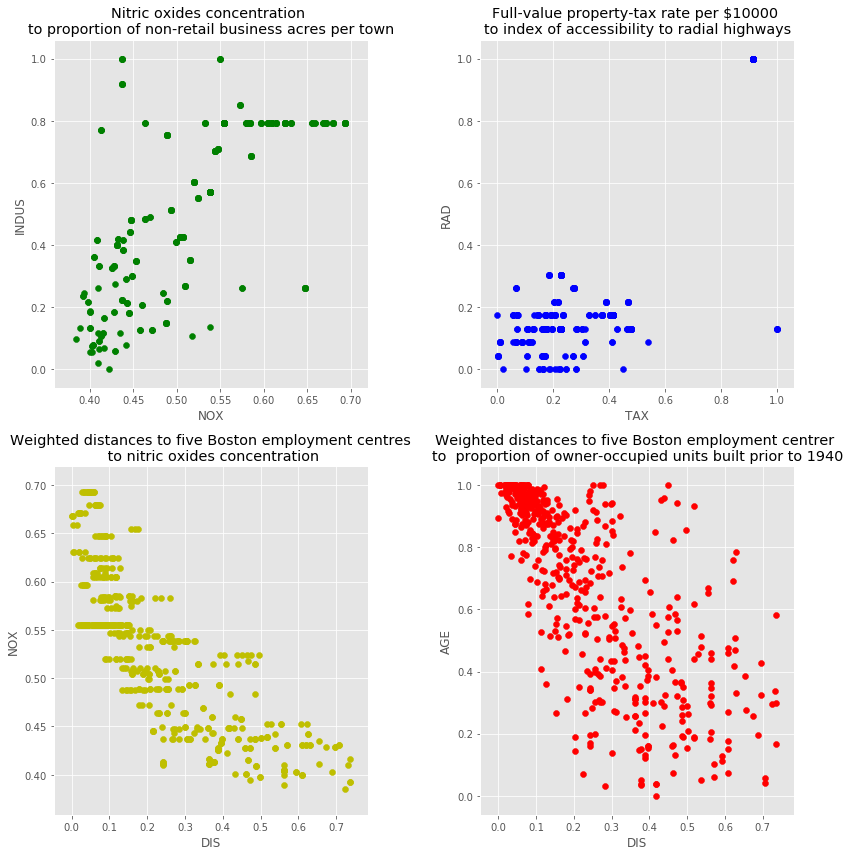

In [14]:
plotFeatures()

In [15]:
dataset.corr().style.applymap(colorCorrelatedFeatures)

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
CR,1.000000,-0.200469,0.352188,-0.055892,0.495886,-0.219247,0.352734,-0.389057,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.643928,-0.042697,-0.584280,0.311991,-0.569537,0.609746,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.352188,-0.643928,1.000000,0.105238,0.648586,-0.428583,0.572571,-0.644311,0.529890,0.613338,0.420531,-0.301809,0.567246,-0.505093
CHAS,-0.055892,-0.042697,0.105238,1.000000,0.007674,0.091251,0.086518,-0.095748,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.495886,-0.584280,0.648586,0.007674,1.000000,-0.249425,0.752257,-0.810125,0.570451,0.622758,0.306780,-0.312849,0.554189,-0.360033
RM,-0.219247,0.311991,-0.428583,0.091251,-0.249425,1.000000,-0.240265,0.223468,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.572571,0.086518,0.752257,-0.240265,1.000000,-0.742399,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.389057,0.609746,-0.644311,-0.095748,-0.810125,0.223468,-0.742399,1.000000,-0.504218,-0.551729,-0.262901,0.300363,-0.496330,0.265375
RAD,0.625505,-0.311948,0.529890,-0.007368,0.570451,-0.209847,0.456022,-0.504218,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.613338,-0.035587,0.622758,-0.292048,0.506456,-0.551729,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [16]:
dataset.head()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
0,0.00632,18.0,0.137444,0,0.538,6.575,0.641607,0.269203,0.000000,0.208015,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.491085,0,0.469,6.421,0.782698,0.348962,0.043478,0.104962,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.491085,0,0.469,7.185,0.599382,0.348962,0.043478,0.104962,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.127786,0,0.458,6.998,0.441813,0.448545,0.086957,0.066794,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.127786,0,0.458,7.147,0.528321,0.448545,0.086957,0.066794,18.7,396.90,5.33,36.2


### OLS

Let's try to perform basic linear regression on the current features. 
OLS module supports different configurations and different regressions:

1. Basic linear regression, which is stastically calculated, using matrix operations
2. Gradient descent and its specifications, like (SGD and minibatch GD)

In [17]:
train_data = dataset.sample(frac = 0.8)
test_data = dataset.drop(train_data.index)

### Linear regression predictions

Perform basic statistical linear regression:

This type of the regression provides the minimal MSE error and provides best fit for the data, however, the computation complexity is near O(n^2) to O(n^3) depending on the implementation of the matrix multiplication

In [18]:
def create_linear_model(train_data, labels, target) -> OLS:
    """
    Create linear regression model and perform fit
    
    Input:
        labels - the list of the labels from the dataset
        targets - the name of the target from the dataset
    
    """
    model = OLS()
    model.fit(
        np.array(train_data[labels]), 
        np.array(train_data[[target]])
    )
    return model

def render_plot(axes, dataset: pd.DataFrame, prediction, 
                label: str, target: str, split: str):
    """
        Renders plot on the matplotlib.axes
        
        Input:
            axes - axes to draw on
            dataset - train and test datasets
            prediction - vector of predictions
            label - feature label
            target - target label
            split - string, which shows, which split is it
    """
    
    color = (np.random.rand(), np.random.rand(), np.random.rand())
    
    axes.scatter(dataset[[label]], dataset[[target]], c=[color])
    
    axes.set_title("Regression result between {} and {} ({})".format(label, target, split))
    axes.set_xlabel(label)
    axes.set_ylabel(target)
    
    axes.plot(
        dataset[[label]], 
        prediction,
        c = 'r'
    )

def visualize_linear_reg_result(model: OLS, train_data, test_data, label, target):
    """
    Draw a scatter plot with the prediction line:
    
    Input:
        label - the name of the label from the dataset
        target - the name of the target from the dataset
    """
    
    slopes = model.slopes
    
    prediction = model.predict(np.array(train_data[[label]]))
    print("Train data score: ", model.score(np.array(train_data[[target]]), prediction))
    
    figure, (axes1, axes2) = plt.subplots(1, 2, figsize = (12, 6))
    
    render_plot(axes1, train_data, prediction, label, target, 'train_data')

    prediction = model.predict(np.array(test_data[[label]]))
    print("Test data score: ", model.score(np.array(test_data[[target]]), prediction))
    
    render_plot(axes2, test_data, prediction, label, target, 'test_data')
    
    figure.tight_layout()
    
    plt.show()

In [19]:
%%time
linear_model = create_linear_model(train_data, ['NOX'], 'INDUS')

CPU times: user 3.79 ms, sys: 410 µs, total: 4.2 ms
Wall time: 3.18 ms


Train data score:  0.035740732157908475
Test data score:  0.04578273654640443


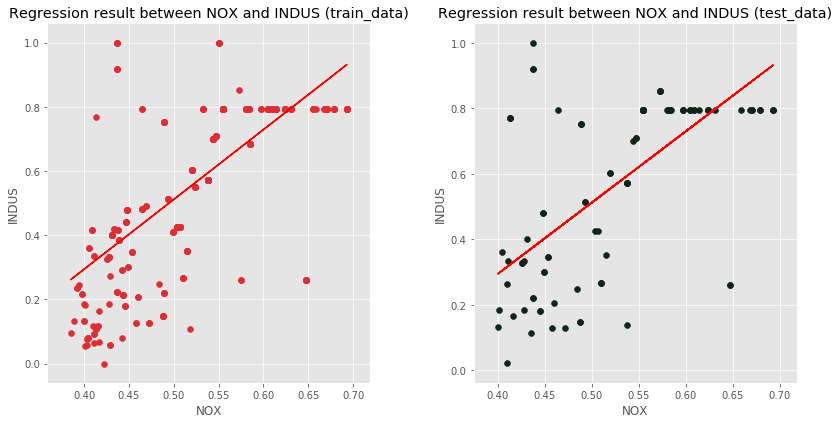

In [20]:
visualize_linear_reg_result(linear_model, train_data, test_data, 'NOX', 'INDUS')

In [21]:
%%time
linear_model = create_linear_model(train_data, ['DIS'], 'NOX')

CPU times: user 4.5 ms, sys: 412 µs, total: 4.91 ms
Wall time: 3.92 ms


Train data score:  0.0020585387556862696
Test data score:  0.0022940083001605086


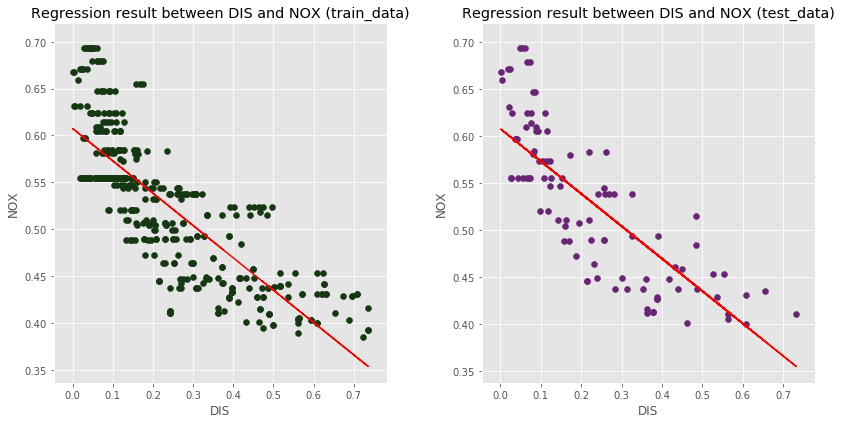

In [22]:
visualize_linear_reg_result(linear_model, train_data, test_data, 'DIS', 'NOX')

In [23]:
%%time
linear_model = create_linear_model(train_data, ['RAD'], 'TAX')

CPU times: user 3.06 ms, sys: 241 µs, total: 3.3 ms
Wall time: 2.44 ms


Train data score:  0.016179926481793488
Test data score:  0.023926220571327757


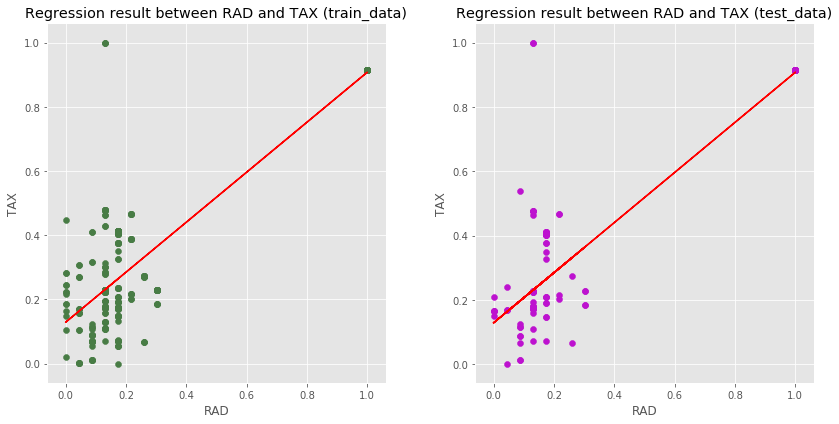

In [24]:
visualize_linear_reg_result(linear_model, train_data, test_data, 'RAD', 'TAX')

In [25]:
%%time
linear_model = create_linear_model(train_data, ['DIS'], 'AGE')

CPU times: user 2.88 ms, sys: 219 µs, total: 3.1 ms
Wall time: 2.14 ms


Train data score:  0.03829548422885828
Test data score:  0.03567132295742317


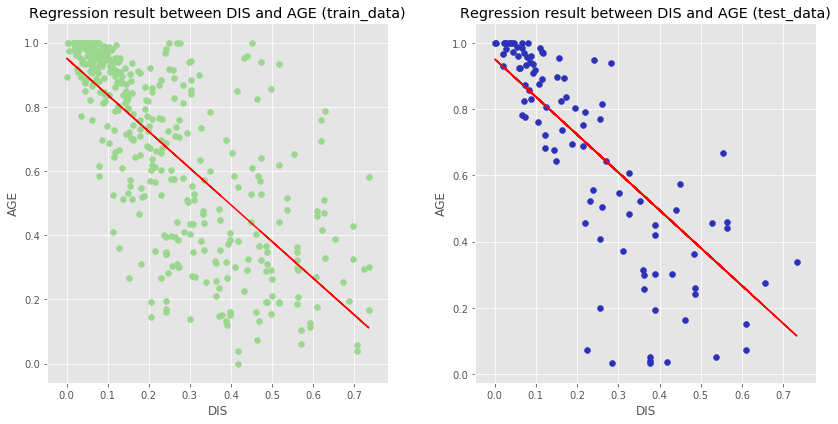

In [26]:
visualize_linear_reg_result(linear_model, train_data, test_data, 'DIS', 'AGE')

# Gradient descent

Gradient descent is the approach, which is used to minimize some function by repeated iterated move in the direction of the minimum.

There are 3 basic parameters for GD:

1. Number of the iterations is the first one and it shows, how much iterations should be performed
2. Tolerance is the threshold of the difference in the cost function values. As we use GD, the cost function is the MSE.
3. Learning step tells the model, how fast should it move to the minimum of the function. The better the learning learning step is chosen, the faster the model will find the minimum. In comparison, a big learning step can result into overflow and a small learning step can significantly decrease the speed of the approximation.

Current implementation supports all these options and sets `slopes_records` and `cost_records` to visualize the process

Also OLS module supports:

1. Stochastic Gradient Descent is the gd, but takes only one sample from the training dataset per iteration. (It is the simplest implementation, where the learning step plays the key-role, other implementations can be found [here](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)
2. Minibatch Gradient Descent is the sgd, but takes m samples from the trainit dataset per iteration.

In [27]:
def create_gd_model(train_data, 
                    labels, 
                    target, 
                    number_of_iterations = 1000,
                    tolerance = 0.00001, 
                    learning_step = 0.001,
                    batch_size = 1,
                    type = 'GD') -> OLS:
    """
    Create gd model and perform fit
    
    Input:
        labels - the list of the labels from the dataset
        targets - the name of the target from the dataset
    
    """
    model = OLS(number_of_iterations, tolerance, learning_step, batch_size, type)
    model.fit(
        np.array(train_data[labels]), 
        np.array(train_data[[target]])
    )
    return model

In [28]:
def render_approximation_process(model: OLS, train_data, label, target, skipOffset = 20):
    """
    Renders the process approximation using the cost records from the model
    
    Input:
        model - OLS model
        train_data - dataset for train
        label - label from the train dataset
        target - target label from the train dataset
        skipOffset - shows the number of records to skip
    """
    mse_errors = model.cost_records
    slopes_records = [model.slopes_records[0]]
    slopes_records += model.slopes_records[::skipOffset]
    slopes_records += [model.slopes_records[-1]]
    
    number_of_iterations = len(mse_errors)
    
    figure, (axes1, axes2) = plt.subplots(1, 2, figsize = (12, 6))
    
    axes1.set_title("MSE error")
    axes1.plot(np.arange(number_of_iterations), mse_errors)
    
    minimum = train_data[[label]].min()
    maximum = train_data[[label]].max()
    
    lin_space = np.linspace(minimum, maximum, 100)
    
    axes2.set_title("Learning process")
    axes2.scatter(train_data[[label]], train_data[target], c='r')
    
    for slope in enumerate(slopes_records):
        color = 'r' if slope[0] < len(slopes_records) - 1 else 'b'
        linewidth = 0.5 if slope[0] < len(slopes_records) - 1 else 1
        slopes = np.flip(slope[1].reshape(len(slope[1])), 0)
        function = np.poly1d(slopes)
        
        axes2.plot(lin_space, function(lin_space), linewidth = linewidth, c=color)

    figure.tight_layout()

### Video animation

Visualize the learning process at the speed of the 30 FPS and saves the output video to the file `videos/label_target_model_type_animation.mp4`. Add manually to the notebook, as execution can take time, 

In [29]:
def animate_approximation_process(model: OLS, train_data, label, target, skipOffset = 1):
    """
    Renders the process approximation using the cost records from the model and
    saves the result to the basic_animation.mp4
    
    Input:
        model - OLS model
        train_data - dataset for train
        label - label from the train dataset
        target - target label from the train dataset
        skipOffset - shows the number of records to skip
    """
    mse_errors = model.cost_records
    slopes_records = [model.slopes_records[0]]
    slopes_records += model.slopes_records[::skipOffset]
    slopes_records += [model.slopes_records[-1]]
    
    number_of_iterations = len(slopes_records)
    
    figure, (axes1, axes2) = plt.subplots(1, 2, figsize = (12, 6))
    
    axes1.set_title("MSE error")
    axes1.set_xlabel("Number of iterations")
    axes1.set_ylabel("MSE error")
    
    mse_plot = axes1.plot()
    
    minimum = train_data[[label]].min()
    maximum = train_data[[label]].max()
    
    lin_space = np.linspace(minimum, maximum, 100)
    
    axes2.set_title("Learning process")
    axes2.scatter(train_data[[label]], train_data[target], c='r')
    axes2.set_xlabel(label)
    axes2.set_ylabel(target)
    axes2.set_ylim(bottom=train_data[target].min() - 0.1)
    
    line_plot, = axes2.plot(lin_space, lin_space)
    
    def animate(frame):
        # Render mse error
        if frame < len(mse_errors):
            axes1.plot(np.arange(number_of_iterations)[:frame], mse_errors[:frame], c='r')

        # Render slopes
        slope = slopes_records[frame]
        slopes = np.flip(slope.reshape(len(slope)), 0)
        function = np.poly1d(slopes)
        
        color = 'r' if frame < len(slopes_records) - 1 else 'y'
        linewidth = 0.5 if frame < len(slopes_records) - 1 else 1
        
        predictions = function(lin_space)

        line_plot.set_ydata(predictions)
        line_plot.set_color(color)
        line_plot.set_linewidth(linewidth)
        line_plot.set_alpha(0.8)
    
    animation = FuncAnimation(figure, animate, frames = number_of_iterations)
    animation.save('videos/{}-{}-{}.mp4'.format(label, target, model.type), fps=30, extra_args=['-vcodec', 'libx264'])
    return None

## NOX/INDUS

In [30]:
%%time
gd_model = create_gd_model(train_data, ['NOX'], 'INDUS')

CPU times: user 21 ms, sys: 4.48 ms, total: 25.5 ms
Wall time: 22.1 ms


Train data score:  0.03705760981933496
Test data score:  0.0455451388736716


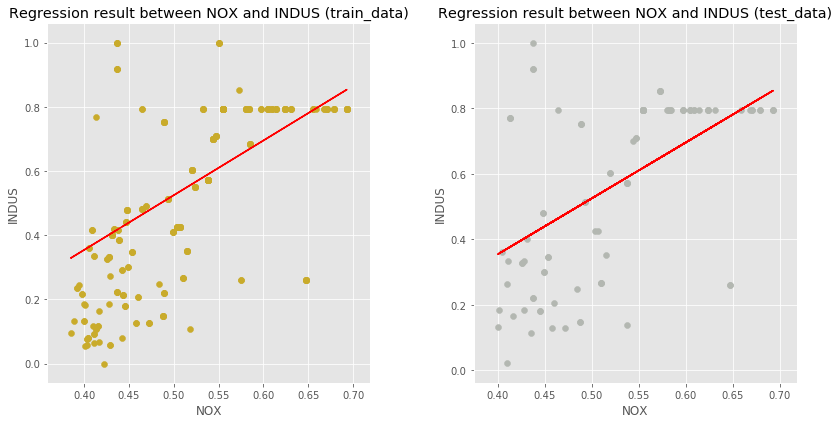

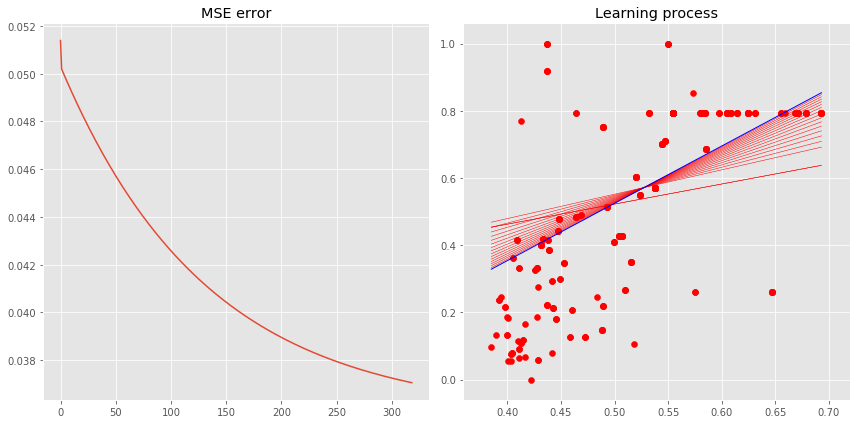

In [31]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'NOX', 'INDUS')
render_approximation_process(gd_model, train_data, 'NOX', 'INDUS')

In [32]:
%%time
gd_model = create_gd_model(
    train_data, 
    ['NOX'], 
    'INDUS', 
    number_of_iterations=3000,
    learning_step=0.01, 
    type='SGD'
)

CPU times: user 15.1 ms, sys: 2.96 ms, total: 18 ms
Wall time: 15.9 ms


Train data score:  0.04990014803978821
Test data score:  0.056325592988676405


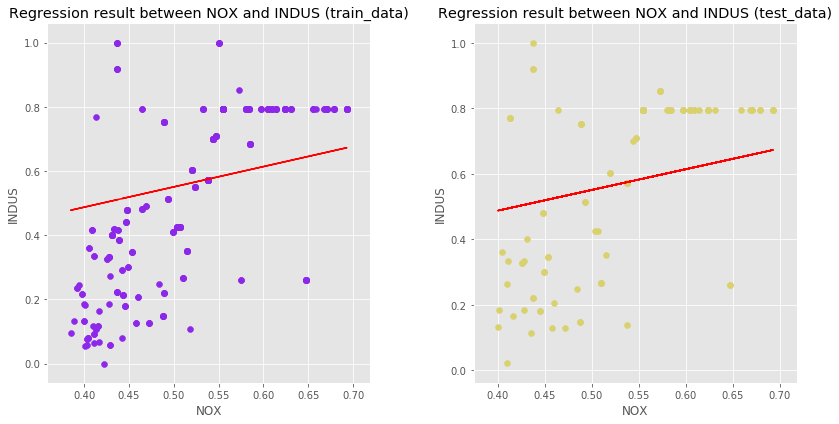

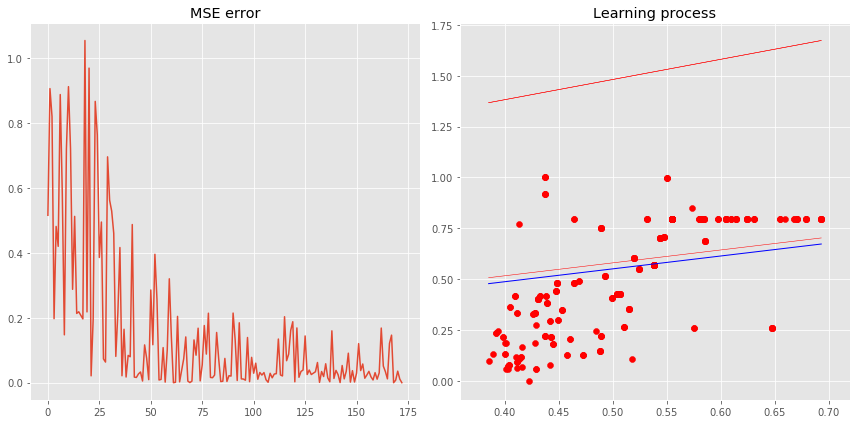

In [33]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'NOX', 'INDUS')
render_approximation_process(gd_model, train_data, 'NOX', 'INDUS', skipOffset = 100)

In [34]:
%%time
gd_model = create_gd_model(
    train_data, 
    ['NOX'], 
    'INDUS', 
    batch_size=20,
    learning_step = 0.01,
    type='MGD'
)

CPU times: user 69.1 ms, sys: 4.55 ms, total: 73.6 ms
Wall time: 70.3 ms


Train data score:  0.03620071180233068
Test data score:  0.04532269433706269


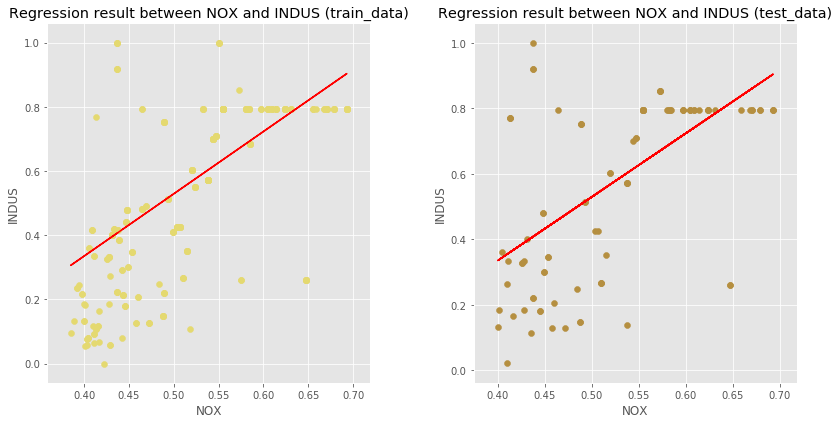

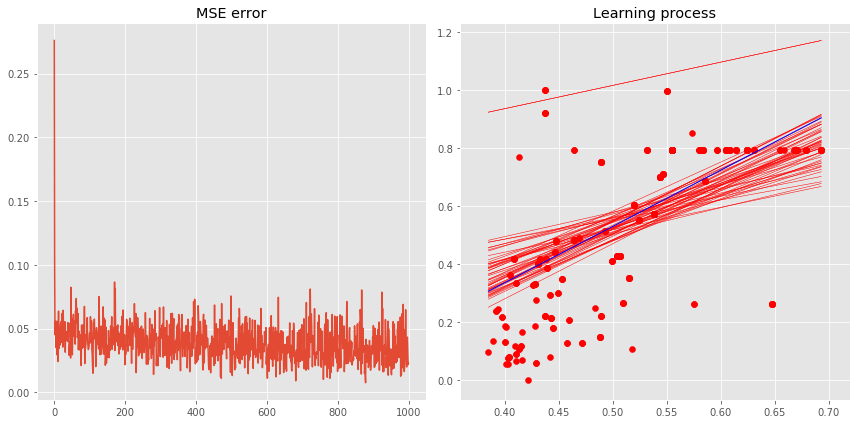

In [35]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'NOX', 'INDUS')
render_approximation_process(gd_model, train_data, 'NOX', 'INDUS', skipOffset = 20)

## DIS/NOX

In [36]:
%%time
gd_model = create_gd_model(train_data, ['DIS'], 'NOX')

CPU times: user 6.39 ms, sys: 974 µs, total: 7.36 ms
Wall time: 6.66 ms


Train data score:  0.0022496796393310435
Test data score:  0.0026597532517112924


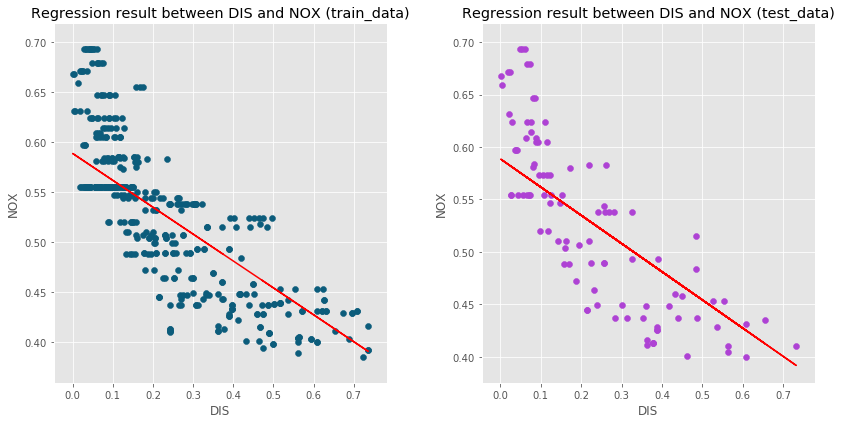

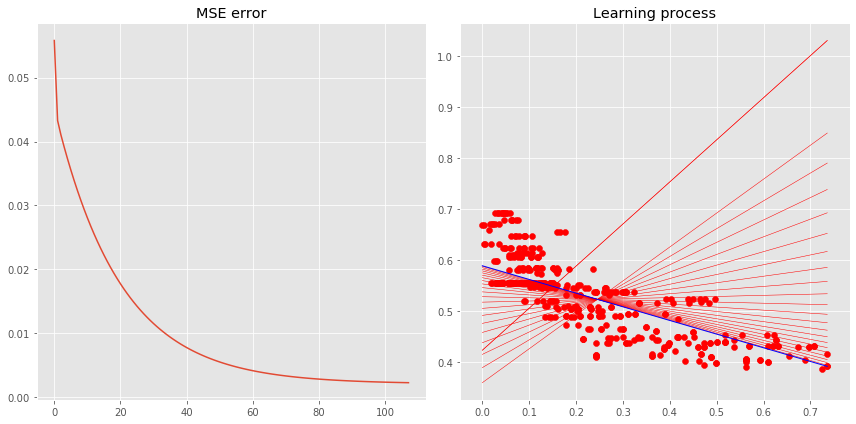

In [37]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'DIS', 'NOX')
render_approximation_process(gd_model, train_data, 'DIS', 'NOX', skipOffset = 5)

In [38]:
%%time
gd_model = create_gd_model(
    train_data, 
    ['DIS'], 
    'NOX',
    number_of_iterations=1000,
    tolerance = 0,
    learning_step=0.1, 
    type='SGD'
)

CPU times: user 69.1 ms, sys: 3.94 ms, total: 73.1 ms
Wall time: 72 ms


Train data score:  0.0029648836184321247
Test data score:  0.003190958831203789


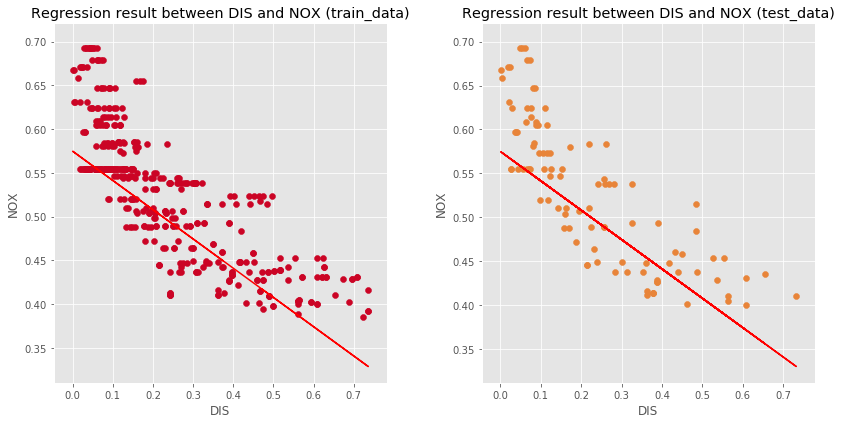

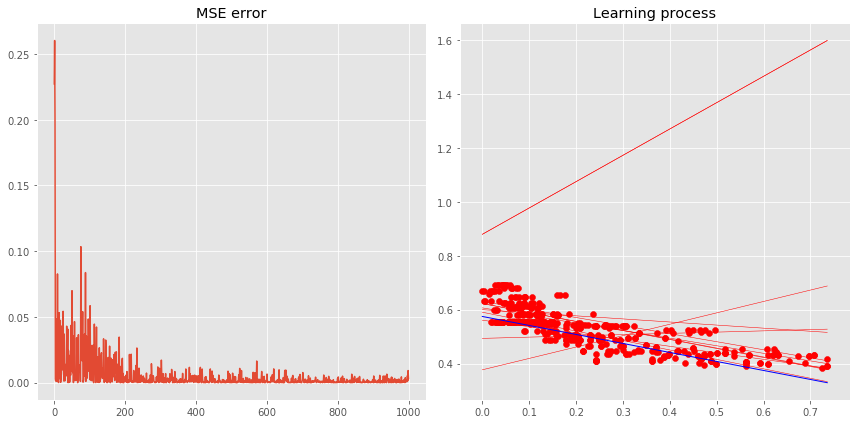

In [39]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'DIS', 'NOX')
render_approximation_process(gd_model, train_data, 'DIS', 'NOX', skipOffset = 100)

In [40]:
%%time
gd_model = create_gd_model(
    train_data,
    ['DIS'], 
    'NOX', 
    tolerance=0,
    batch_size=40, 
    learning_step=0.01,
    type='MGD'
)

CPU times: user 85 ms, sys: 3.43 ms, total: 88.5 ms
Wall time: 87.1 ms


Train data score:  0.002059390372149785
Test data score:  0.0022923590799790714


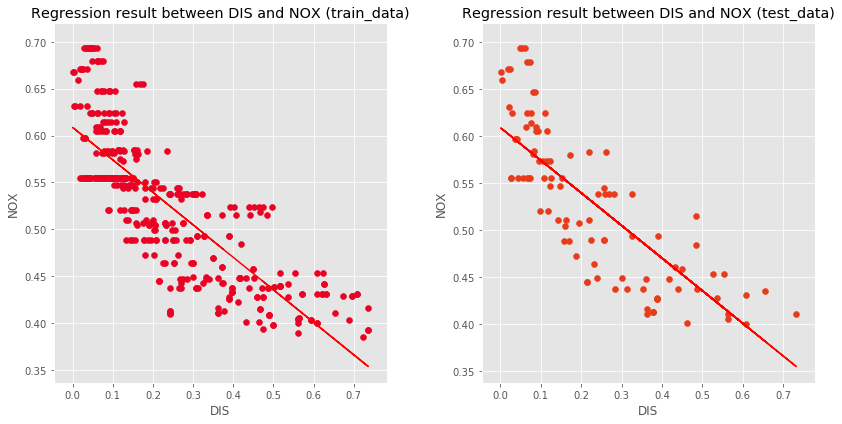

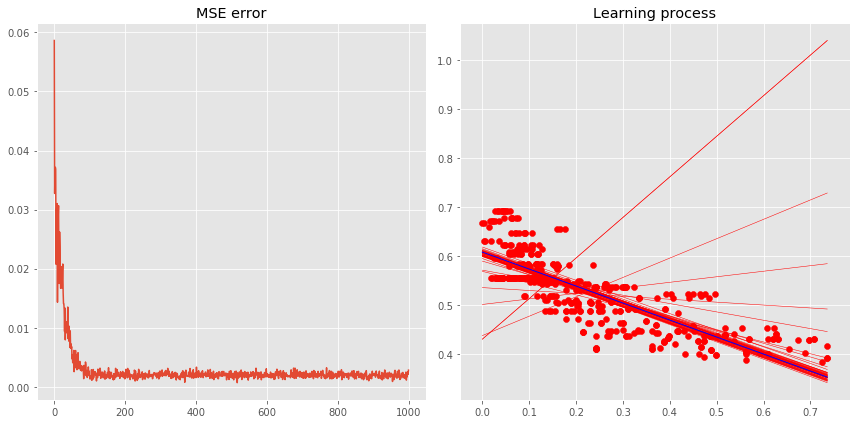

In [41]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'DIS', 'NOX')
render_approximation_process(gd_model, train_data, 'DIS', 'NOX', skipOffset = 20)

## RAD/TAX

In [42]:
%%time
gd_model = create_gd_model(train_data, ['RAD'], 'TAX')

CPU times: user 3.86 ms, sys: 835 µs, total: 4.69 ms
Wall time: 3.87 ms


Train data score:  0.016216345461435574
Test data score:  0.02378829063068052


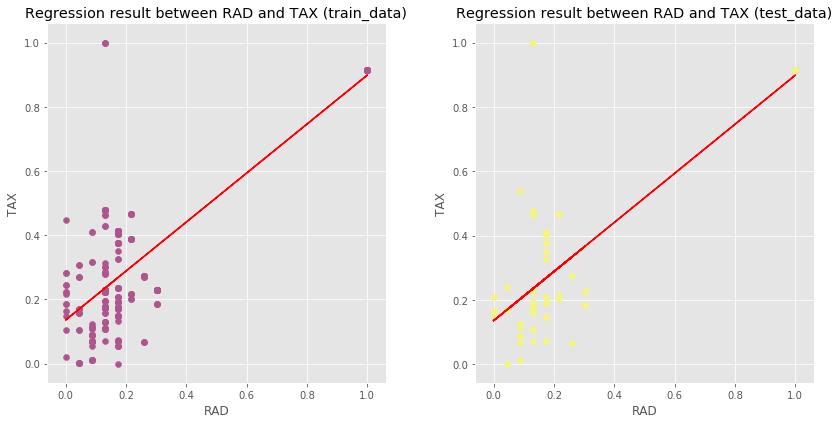

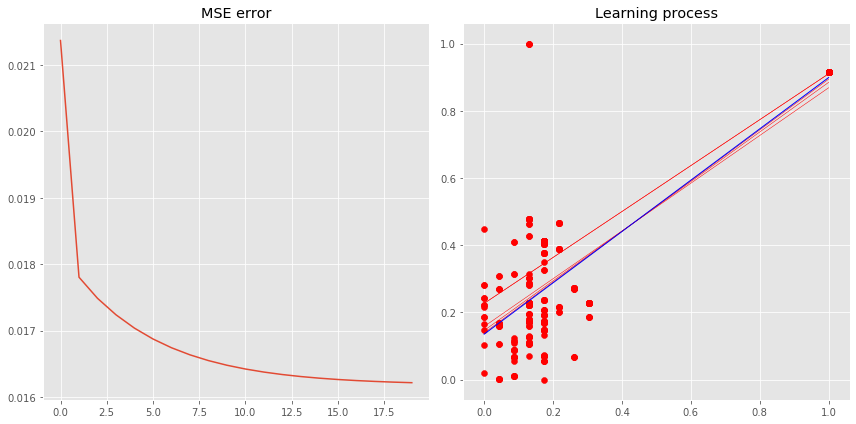

In [43]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'RAD', 'TAX')
render_approximation_process(gd_model, train_data, 'RAD', 'TAX', skipOffset = 5)

In [44]:
%%time
gd_model = create_gd_model(
    train_data, 
    ['RAD'],
    'TAX',
    number_of_iterations=1000,
    learning_step=0.1,
    type='SGD'
)

CPU times: user 6.73 ms, sys: 2.44 ms, total: 9.17 ms
Wall time: 7.47 ms


Train data score:  0.016321737685855344
Test data score:  0.024231112276354973


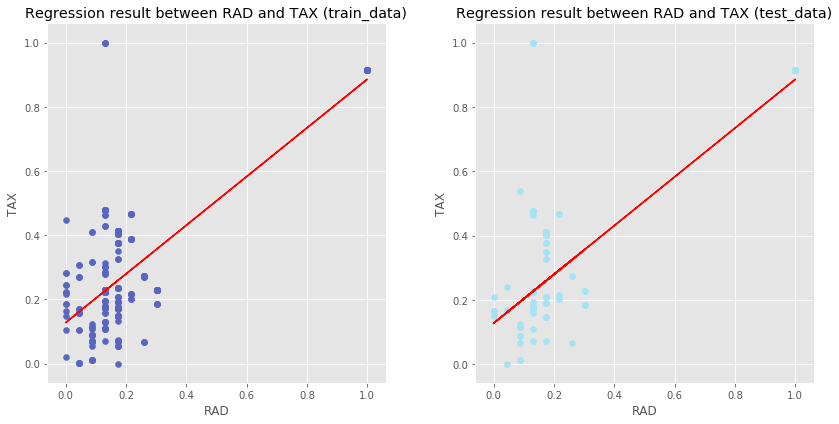

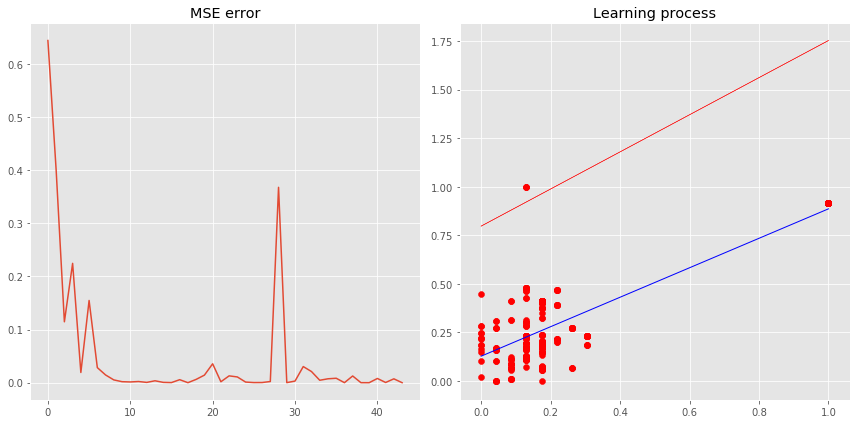

In [45]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'RAD', 'TAX')
render_approximation_process(gd_model, train_data, 'RAD', 'TAX', skipOffset = 100)

In [46]:
%%time
gd_model = create_gd_model(
    train_data,
    ['RAD'], 
    'TAX', 
    batch_size=40, 
    learning_step=0.01,
    type='MGD'
)

CPU times: user 70.8 ms, sys: 3.4 ms, total: 74.2 ms
Wall time: 73.8 ms


Train data score:  0.016870337518630065
Test data score:  0.025438709439837684


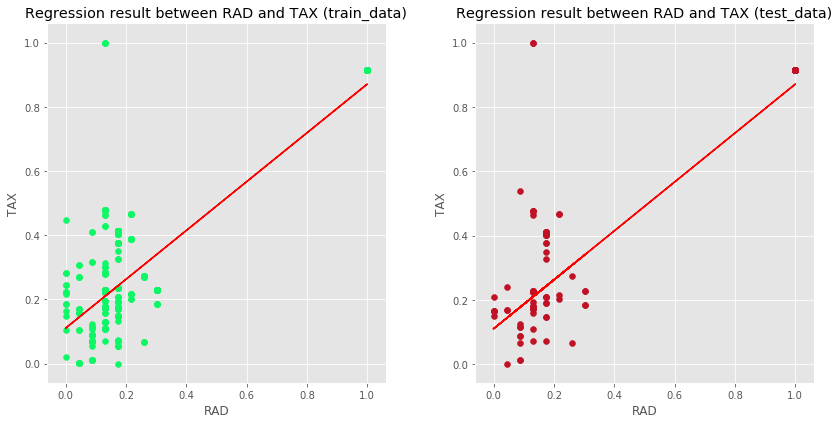

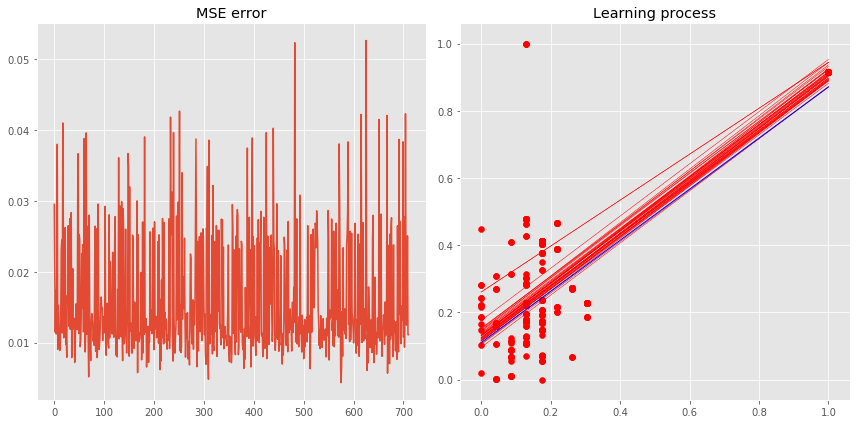

In [47]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'RAD', 'TAX')
render_approximation_process(gd_model, train_data, 'RAD', 'TAX', skipOffset = 20)

## DIS/AGE

In [48]:
%%time
gd_model = create_gd_model(train_data, ['DIS'], 'AGE')

CPU times: user 8.73 ms, sys: 1.39 ms, total: 10.1 ms
Wall time: 9.1 ms


Train data score:  0.03848742466791505
Test data score:  0.03715615035184616


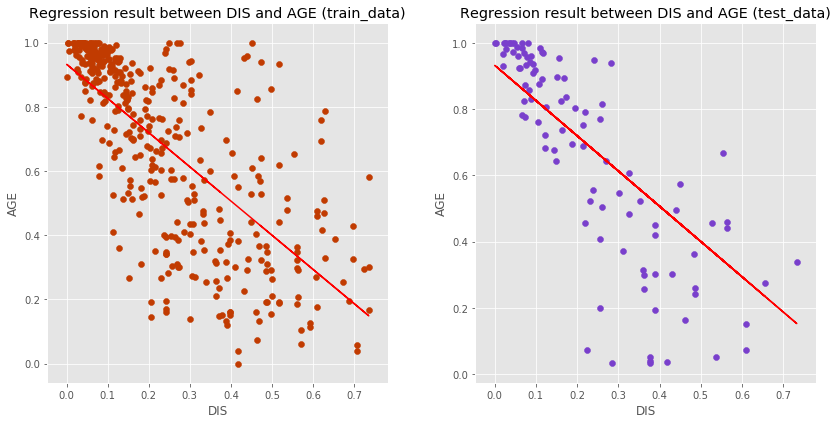

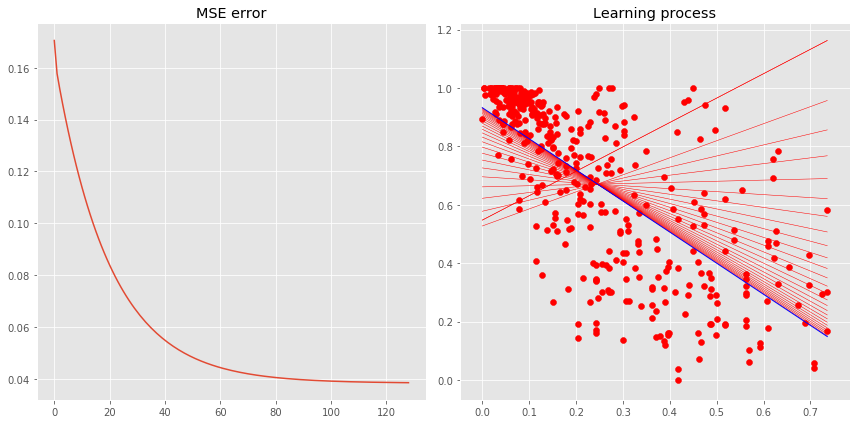

In [49]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'DIS', 'AGE')
render_approximation_process(gd_model, train_data, 'DIS', 'AGE', skipOffset = 5)

In [50]:
%%time
gd_model = create_gd_model(
    train_data, 
    ['DIS'],
    'AGE',
    learning_step=0.1,
    type='SGD'
)

CPU times: user 26.6 ms, sys: 3.66 ms, total: 30.3 ms
Wall time: 36.3 ms


Train data score:  0.04558557778673037
Test data score:  0.04895095424584553


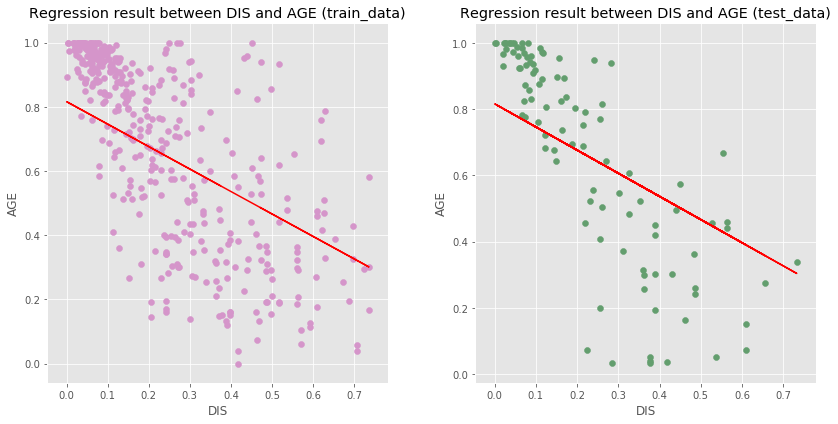

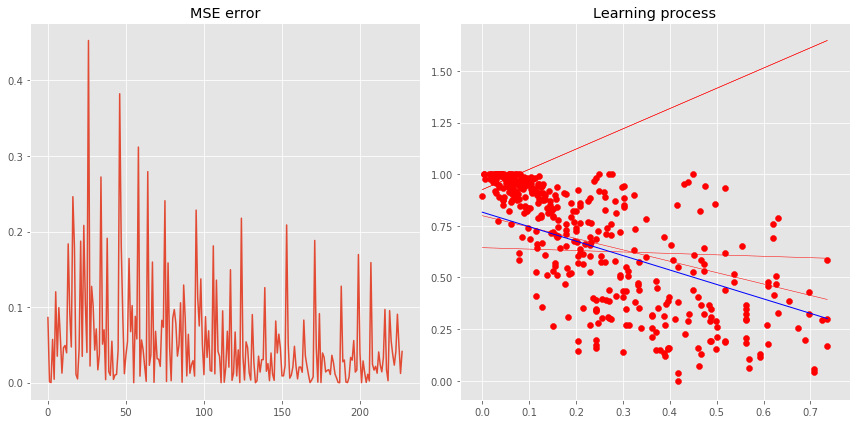

In [51]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'DIS', 'AGE')
render_approximation_process(gd_model, train_data, 'DIS', 'AGE', skipOffset = 100)

In [52]:
%%time
gd_model = create_gd_model(
    train_data,
    ['DIS'], 
    'AGE', 
    batch_size=40, 
    learning_step=0.01,
    type='MGD'
)

CPU times: user 67.4 ms, sys: 1.89 ms, total: 69.3 ms
Wall time: 68.2 ms


Train data score:  0.04026913628088192
Test data score:  0.03512282312461864


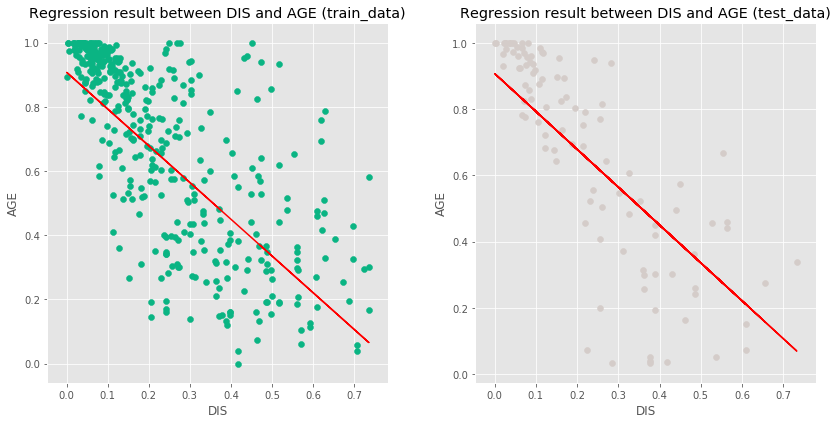

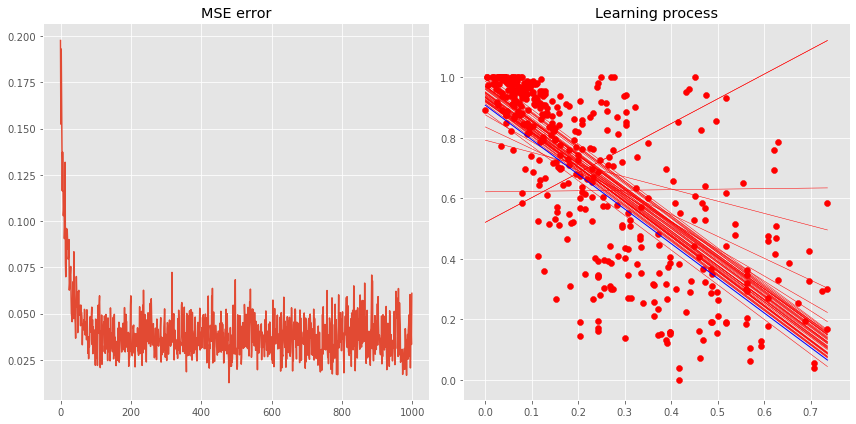

In [53]:
visualize_linear_reg_result(gd_model, train_data, test_data, 'DIS', 'AGE')
render_approximation_process(gd_model, train_data, 'DIS', 'AGE', skipOffset = 20)

### Conclusion

1. According to the results SGD and MGD, which are generally slower than the GD and simple linear regression. It is true, because the dataset is relatively small and on the bigger dataset with the bigger amount of the features, the result of SGD and MGD should win over GD and simple linear regression in time.
2. GD is more stable than MGD from the view of finding the minimum.

# At final, let's try to perform multiple-feature linear regression

We will predict the concentration of nitric oxides basing on the person age and it's distance to Boston centers.

### Distribution

In [54]:
%matplotlib widget

def print_score(model, train_data, test_data, labels, target):
    prediction = model.predict(np.array(train_data[labels]))
    print("Train data score: ", model.score(np.array(train_data[[target]]), prediction))
    prediction = model.predict(np.array(test_data[labels]))
    print("Test data score: ", model.score(np.array(test_data[[target]]), prediction))

def render_3d(data, x_label, y_label, z_label):
    figure = plt.figure(figsize=(6, 6))
    axes = figure.add_subplot(111, projection='3d')
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_zlabel(z_label)
    axes.scatter(data[[x_label]], data[[y_label]], data[[z_label]], c='b', alpha=1, marker='^')

    figure.tight_layout()
    
    figure.show()
    
    return figure, axes
    
def render_3d_lin_reg_result(model, data, x_label, y_label, z_label):
    figure, axes = render_3d(data, x_label, y_label, z_label)
    print(np.array(model.predict(data[[x_label, y_label]])).flat)
    
    x = np.arange(0.0, 1.0, 0.02)
    y = np.arange(0.0, 1.0, 0.02)
    X, Y = np.meshgrid(x, y)
    
    Z = model.slopes[0] + model.slopes[1] * X + model.slopes[2] * Y
    
    axes.plot_surface(X, Y, Z, alpha=0.3)
    
    figure.tight_layout()
    
    figure.show()

In [55]:
render_3d(train_data, 'DIS', 'AGE', 'NOX')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(<Figure size 600x600 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x10f66dd90>)

### Linear regression

In [56]:
%%time
linear_model = create_linear_model(train_data, ['DIS', 'AGE'], 'NOX')

CPU times: user 15.7 ms, sys: 344 µs, total: 16.1 ms
Wall time: 2.03 ms


In [57]:
print_score(linear_model, train_data, test_data, ['DIS', 'AGE'], 'NOX')

Train data score:  0.0017609489360813633
Test data score:  0.0019272506177380434


In [58]:
render_3d_lin_reg_result(linear_model, train_data, 'DIS', 'AGE', 'NOX')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## GD

In [59]:
%%time
gd_model = create_gd_model(
    train_data,
    ['DIS', 'AGE'], 
    'NOX',
    type='GD'
)

CPU times: user 60.3 ms, sys: 8.56 ms, total: 68.8 ms
Wall time: 12.1 ms


In [60]:
print_score(gd_model, train_data, test_data, ['DIS', 'AGE'], 'NOX')

Train data score:  0.002398236226799314
Test data score:  0.002348758815994401


In [61]:
render_3d_lin_reg_result(gd_model, train_data, 'DIS', 'AGE', 'NOX')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### SGD

In [62]:
%%time
gd_model = create_gd_model(
    train_data, 
    ['DIS', 'AGE'],
    'NOX',
    number_of_iterations=3000,
    tolerance = 0.0000001,
    learning_step=0.01,
    type='SGD'
)

CPU times: user 158 ms, sys: 2.62 ms, total: 160 ms
Wall time: 161 ms


In [63]:
print_score(gd_model, train_data, test_data, ['DIS', 'AGE'], 'NOX')

Train data score:  0.005377741718997383
Test data score:  0.004517335210932498


In [64]:
render_3d_lin_reg_result(gd_model, train_data, 'DIS', 'AGE', 'NOX')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## MGD

In [65]:
%%time
gd_model = create_gd_model(
    train_data,
    ['DIS', 'AGE'], 
    'NOX', 
    tolerance=0.000001,
    batch_size=40,
    learning_step=0.001,
    type='MGD'
)

CPU times: user 614 ms, sys: 13.9 ms, total: 628 ms
Wall time: 84.3 ms


In [66]:
print_score(gd_model, train_data, test_data, ['DIS', 'AGE'], 'NOX')

Train data score:  0.004340438233593752
Test data score:  0.003683058900529984


In [67]:
render_3d_lin_reg_result(gd_model, train_data, 'DIS', 'AGE', 'NOX')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …